In [1]:
import numpy as np
from math import ceil,log,log10,sqrt
import matplotlib.pyplot as plt
import pandas as pd
import dill


In [2]:
filename = 'globalsave.pkl'
# dill.load_session(filename)

In [3]:
def UCB(horizon,replications,arms_prob,ucbtype=1):

    optimal_arm = 0

    optimal_arm_pulls_per_round = np.zeros([horizon,replications])
    regret_per_round = np.zeros([horizon,replications])
    
    np.random.seed(1234)

    for r in range(replications):
        arm_means = [0]*len(arms_prob)
        arm_pulls = [0]*len(arms_prob)
        t = 0
        #initially playing each arm once
        for i in range(len(arms_prob)):
            arm_pulls[i]+=1
            temp = np.random.binomial(1,arms_prob[i])
            arm_means[i] += (temp - arm_means[i])/arm_pulls[i]
            if i == optimal_arm:
                optimal_arm_pulls_per_round[t][r] += 1
            regret_per_round[t][r] = (arms_prob[optimal_arm] - arms_prob[i])
            t+=1
            
        while t < horizon:
            #Picking arm according to UCB algorithm or UCB' algorithm
            if ucbtype == 1:
                UCBEstimate = arm_means + np.sqrt(2*np.log(t)/arm_pulls)
                arm_selected = np.argmax(UCBEstimate)
            else:
                UCBEstimate = arm_means + np.sqrt(2*np.log(horizon)/arm_pulls)
                arm_selected = np.argmax(UCBEstimate)

            arm_pulls[arm_selected] += 1
            temp = np.random.binomial(1, arms_prob[arm_selected])
            arm_means[arm_selected] += (temp - arm_means[arm_selected]) /arm_pulls[arm_selected]
            if arm_selected == optimal_arm:
                optimal_arm_pulls_per_round[t][r] += 1
            regret_per_round[t][r] = (arms_prob[optimal_arm] - arms_prob[arm_selected])
            t+=1


    # Calculating Mean and Standard Error for % optimal arm pulls
    optimal_arm_means_stderr = np.zeros([horizon,2])
    optimal_arm_means_stderr[:,0] = np.mean(optimal_arm_pulls_per_round,axis=1)
    optimal_arm_means_stderr[:,1] = (np.std(optimal_arm_pulls_per_round, axis=1)/sqrt(replications))
    optimal_arm_percentage = sum(optimal_arm_means_stderr[:,0])/horizon*100
    optimal_arm_pulls_sum = np.cumsum(optimal_arm_means_stderr[:,0])/horizon*100
    print("\nTotal Optimal arm pulls :",sum(optimal_arm_means_stderr[:,0]),'and percentage is :',optimal_arm_percentage)


    # Calculating Mean and Standard Error for commulative regret
    regret_means_stderr = np.zeros([horizon,2])
    regret_means_stderr[:,0] = np.mean(regret_per_round,axis=1)
    regret_means_stderr[:,1] = (np.std(regret_per_round, axis=1)/sqrt(replications))
    total_regret = sum(regret_means_stderr[:,0])
    regret_per_round_sum = np.cumsum(regret_means_stderr[:,0])
    print("Total Regret :",total_regret)


    return regret_per_round_sum,regret_means_stderr, optimal_arm_pulls_sum,optimal_arm_means_stderr,optimal_arm_percentage,total_regret



In [4]:
def UCB1(horizon,replications,arms_prob,ucbtype=1):

    optimal_arm = 0

    optimal_arm_pulls_per_round = np.zeros([horizon,replications])
    regret_per_round = np.zeros([horizon,replications])
    
    np.random.seed(1234)

    for r in range(replications):
        arm_means = [0]*len(arms_prob)
        arm_pulls = [0]*len(arms_prob)
        t = 0
        #initially playing each arm once
        for i in range(len(arms_prob)):
            arm_pulls[i]+=1
            temp = np.random.binomial(1,arms_prob[i])
            arm_means[i] += (temp - arm_means[i])/arm_pulls[i]
            optimal_arm_pulls_per_round[t][r] = arm_pulls[optimal_arm]*100.0/(t+1)
            regret_per_round[t][r] = (arms_prob[optimal_arm] - arms_prob[i])
            t+=1
            
        while t < horizon:
            #Picking arm according to UCB algorithm or UCB' algorithm
            if ucbtype == 1:
                UCBEstimate = arm_means + np.sqrt(2*np.log(t)/arm_pulls)
                arm_selected = np.argmax(UCBEstimate)
            else:
                UCBEstimate = arm_means + np.sqrt(2*np.log(horizon)/arm_pulls)
                arm_selected = np.argmax(UCBEstimate)

            arm_pulls[arm_selected] += 1
            temp = np.random.binomial(1, arms_prob[arm_selected])
            arm_means[arm_selected] += (temp - arm_means[arm_selected]) /arm_pulls[arm_selected]
            optimal_arm_pulls_per_round[t][r] = arm_pulls[optimal_arm]*100.0/(t+1)
            regret_per_round[t][r] = (arms_prob[optimal_arm] - arms_prob[arm_selected])
            t+=1


    # Calculating Mean and Standard Error for % optimal arm pulls
    optimal_arm_means_stderr = np.zeros([horizon,2])
    optimal_arm_means_stderr[:,0] = np.mean(optimal_arm_pulls_per_round,axis=1)
    optimal_arm_means_stderr[:,1] = (np.std(optimal_arm_pulls_per_round, axis=1)/sqrt(replications))
    optimal_arm_percentage = sum(optimal_arm_means_stderr[:,0])/horizon
    optimal_arm_pulls_sum = np.mean(optimal_arm_pulls_per_round,axis=1)
    print("\nTotal Optimal arm pulls :",sum(optimal_arm_means_stderr[:,0]),'and percentage is :',optimal_arm_percentage)


    # Calculating Mean and Standard Error for commulative regret
    regret_means_stderr = np.zeros([horizon,2])
    regret_means_stderr[:,0] = np.mean(regret_per_round,axis=1)
    regret_means_stderr[:,1] = (np.std(regret_per_round, axis=1)/sqrt(replications))
    total_regret = sum(regret_means_stderr[:,0])
    regret_per_round_sum = np.cumsum(regret_means_stderr[:,0])
    print("Total Regret :",total_regret)


    return regret_per_round_sum,regret_means_stderr, optimal_arm_pulls_sum,optimal_arm_means_stderr,optimal_arm_percentage,total_regret



In [5]:
def plotOptimalArmPulls_old(horizon,optimal_arm_means_stderr,optimal_arm_pulls_sum,problem,step):
    x = np.arange(horizon)
    ind = [i for i in range(0,horizon,step)]

    for i in range(m_len):
        plt.errorbar(x[ind],optimal_arm_pulls_sum[i,ind], optimal_arm_means_stderr[i,ind,1],
                    linestyle='-', marker='x',capsize=4,capthick=1.5,elinewidth=1.5)
    plt.xlabel('Steps')
    plt.ylabel('% Commulative Optimal Arm Pulls')
    plt.legend(['UCB',"UCB'"],loc=0,frameon=False)
    plt.title(arms_prob[problem])
    plt.xlim((0,10000))
    plt.ylim((0,100))
    plt.savefig('OptimalArmPulls_'+str(problem)+str(problem)+'.png',dpi=300)
    plt.show()

    print("optimal_arm_stderr")
    print(optimal_arm_means_stderr[:,[500,2000,5000,8000,9500],1])

In [6]:
def plotOptimalArmPulls_old1(horizon,optimal_arm_means_stderr,optimal_arm_pulls_sum,problem,step):
    x = np.arange(horizon)
    ind = [i for i in range(0,horizon,step)]

    for i in range(m_len):
        plt.errorbar(x[ind],optimal_arm_means_stderr[i,ind,0]*100.0, optimal_arm_means_stderr[i,ind,1],
                    linestyle='-', marker='x',capsize=4,capthick=1.5,elinewidth=1.5)
    plt.xlabel('Steps')
    plt.ylabel('% Average Optimal Arm Pulls per step')
    plt.legend(['UCB',"UCB'"],loc=0,frameon=False)
    plt.title(arms_prob[problem])
    plt.xlim((0,10000))
    plt.ylim((0,100))
    plt.savefig('OptimalArmPulls_old1_'+str(problem)+'.png',dpi=300)
    plt.show()

    print("optimal_arm_means_stderr")
    print(optimal_arm_means_stderr[:,[500,2000,5000,8000,9500],1])

In [7]:
def plotOptimalArmPulls(horizon,optimal_arm_means_stderr,optimal_arm_pulls_sum,problem,step):
    x = np.arange(horizon)
    ind = [i for i in range(0,horizon,step)]

    for i in range(m_len):
        plt.errorbar(x[ind],optimal_arm_pulls_sum[i,ind], optimal_arm_means_stderr[i,ind,1],
                    linestyle='-', marker='x',capsize=4,capthick=1.5,elinewidth=1.5)
    plt.xlabel('Steps')
    plt.ylabel('% Average Optimal Arm Pulls per step')
    plt.legend(['UCB',"UCB'"],loc=0,frameon=False)
    plt.title(arms_prob[problem])
    plt.xlim((0,10000))
    plt.ylim((0,100))
    plt.savefig('OptimalArmPulls_'+str(problem)+'.png',dpi=300)
    plt.show()

    print("optimal_arm_means_stderr")
    print(optimal_arm_means_stderr[:,[500,2000,5000,8000,9500],1])

In [8]:
def plotCummRegret(horizon,regret_means_stderr,regret_per_round_sum,problem,step):
    x = np.arange(horizon)
    ind = [i for i in range(0,horizon,step)]

    for i in range(m_len):
        plt.errorbar(x[ind],regret_per_round_sum[i,ind], regret_means_stderr[i,ind,1],
                linestyle='-', marker='x',capsize=4,capthick=1.5,elinewidth=1.5)

    plt.xlabel('Steps')
    plt.ylabel('Cumulative Regret')
    plt.legend(['UCB',"UCB'"],loc=0,frameon=False)
    plt.title(arms_prob[problem])
    plt.xlim((0,10000))
    plt.savefig('CumulativeRegret_'+str(problem)+'.png',dpi=300)
    plt.show()

    print("regret_means_stderr")
    print(regret_means_stderr[:,[500,2000,5000,8000,9500],1])

In [9]:
def plotOptimalArmPullsLine(horizon,optimal_arm_means_stderr,optimal_arm_pulls_sum,problem,step):
    x = np.arange(horizon)
    ind = [i for i in range(0,horizon,step)]

    for i in range(m_len):
        plt.plot(optimal_arm_pulls_sum[i,:])
    plt.xlabel('Steps')
    plt.ylabel('% Average Optimal Arm Pulls per step')
    plt.legend(['UCB',"UCB'"],loc=0,frameon=False)
    plt.title(arms_prob[problem])
    plt.xlim((0,10000))
    plt.ylim((0,100))
    plt.savefig('OptimalArmPulls_Line_'+str(problem)+'.png',dpi=300)
    plt.show()

    print("optimal_arm_pulls_mean")
    print(optimal_arm_pulls_sum[:,[500,2000,5000,8000,9500]])

In [10]:
def plotCummRegretLine(horizon,regret_means_stderr,regret_per_round_sum,problem,step):
    x = np.arange(horizon)
    ind = [i for i in range(0,horizon,step)]
    for i in range(m_len):
        plt.plot(regret_per_round_sum[i,:])

    plt.xlabel('Steps')
    plt.ylabel('Cumulative Regret')
    plt.legend(['UCB',"UCB'"],loc=0,frameon=False)
    plt.title(arms_prob[problem])
    plt.xlim((0,10000))
    plt.savefig('CumulativeRegret_Line_'+str(problem)+'.png',dpi=300)
    plt.show()

    print("regret_means_stderr")
    print(regret_per_round_sum[:,[500,2000,5000,8000,9500]])

In [11]:
from IPython.display import HTML, display

def tableIt(data):
    print(pd.DataFrame(data))


Total Optimal arm pulls : 9845.46 and percentage is : 98.4546
Total Regret : 46.362

Total Optimal arm pulls : 9840.15 and percentage is : 98.4015
Total Regret : 47.955


optimal_arm_percentage
         0
0  98.4546
1  98.4015


total_regret
        0
0  46.362
1  47.955


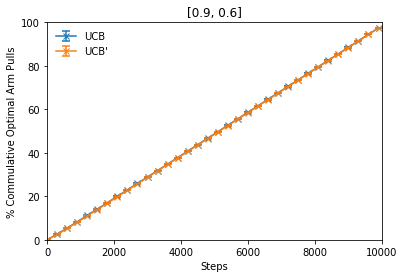

optimal_arm_stderr
[[ 0.0255147   0.014       0.          0.          0.        ]
 [ 0.02374868  0.01959592  0.          0.          0.00994987]]

Total Optimal arm pulls : 9109.8 and percentage is : 91.098
Total Regret : 89.02

Total Optimal arm pulls : 9113.56 and percentage is : 91.1356
Total Regret : 88.644


optimal_arm_percentage
         0
0  91.0980
1  91.1356


total_regret
        0
0  89.020
1  88.644


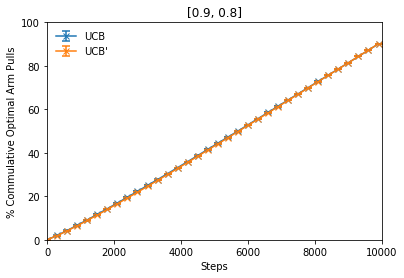

optimal_arm_stderr
[[ 0.04330127  0.0346987   0.02179449  0.014       0.02179449]
 [ 0.04208325  0.03128898  0.02179449  0.02179449  0.02374868]]

Total Optimal arm pulls : 9106.74 and percentage is : 91.0674
Total Regret : 89.326

Total Optimal arm pulls : 9127.13 and percentage is : 91.2713
Total Regret : 87.287


optimal_arm_percentage
         0
0  91.0674
1  91.2713


total_regret
        0
0  89.326
1  87.287


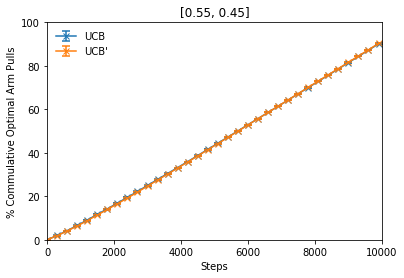

optimal_arm_stderr
[[ 0.04439595  0.03363034  0.01705872  0.          0.01959592]
 [ 0.04737088  0.04073082  0.01959592  0.00994987  0.02179449]]


In [12]:
horizon = 10000
replications = 100
arms_prob = [[0.9, 0.6], [0.9, 0.8], [0.55, 0.45]]
UCBtype = [1,2]
m_len = len(UCBtype)

for problem in range(3):
    optimal_arm_pulls_sum = np.zeros([m_len,horizon])
    regret_per_round_sum = np.zeros([m_len,horizon])
    optimal_arm_means_stderr = np.zeros([m_len,horizon,2])
    regret_means_stderr = np.zeros([m_len,horizon,2])
    optimal_arm_percentage = np.zeros([m_len])
    total_regret = np.zeros([m_len])


    for i in range(m_len):
        regret_per_round_sum[i,:],regret_means_stderr[i,:,:], optimal_arm_pulls_sum[i,:],optimal_arm_means_stderr[i,:,:],optimal_arm_percentage[i],total_regret[i] = UCB(horizon,replications,arms_prob[problem],ucbtype=UCBtype[i])


    step = 300
    print("\n")
    print("optimal_arm_percentage")
    tableIt(optimal_arm_percentage)
    print("\n")
    print("total_regret")
    tableIt(total_regret)

    plotOptimalArmPulls_old(horizon,optimal_arm_means_stderr,optimal_arm_pulls_sum,problem,step)


Total Optimal arm pulls : 960088.844622 and percentage is : 96.0088844622
Total Regret : 46.362

Total Optimal arm pulls : 952847.954069 and percentage is : 95.2847954069
Total Regret : 47.955


optimal_arm_percentage
           0
0  96.008884
1  95.284795


total_regret
        0
0  46.362
1  47.955


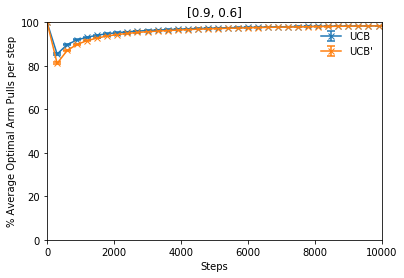

optimal_arm_means_stderr
[[ 0.32182056  0.1350232   0.06799611  0.04602013  0.04007357]
 [ 0.32974173  0.11794742  0.06263657  0.04042323  0.03430104]]


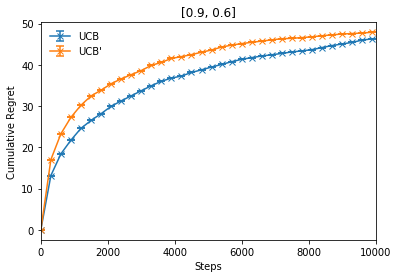

regret_means_stderr
[[ 0.00765441  0.0042      0.          0.          0.        ]
 [ 0.00712461  0.00587878  0.          0.          0.00298496]]


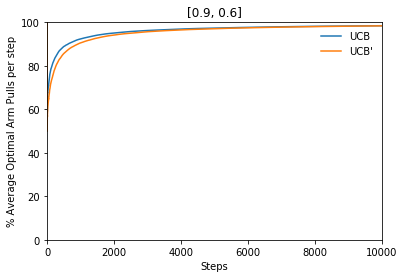

optimal_arm_pulls_mean
[[ 88.9001996   95.11244378  97.3945211   98.18347707  98.39585307]
 [ 85.68063872  94.15992004  97.10757848  98.05174353  98.3263867 ]]


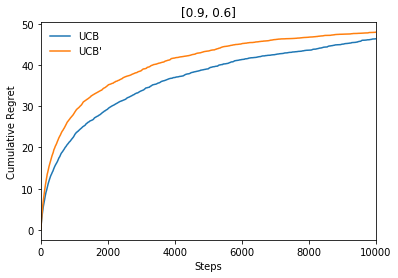

regret_means_stderr
[[ 16.683  29.34   39.09   43.602  45.723]
 [ 21.522  35.058  43.395  46.764  47.703]]

Total Optimal arm pulls : 845413.057852 and percentage is : 84.5413057852
Total Regret : 89.02

Total Optimal arm pulls : 836207.386386 and percentage is : 83.6207386386
Total Regret : 88.644


optimal_arm_percentage
           0
0  84.541306
1  83.620739


total_regret
        0
0  89.020
1  88.644


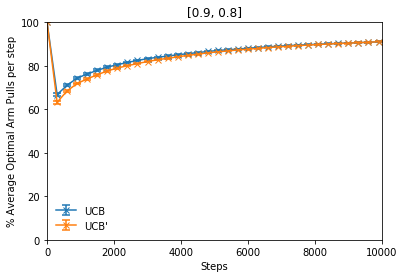

optimal_arm_means_stderr
[[ 0.52832789  0.37923801  0.26112328  0.19756523  0.1814928 ]
 [ 0.52154566  0.37161555  0.25271918  0.19612825  0.17792781]]


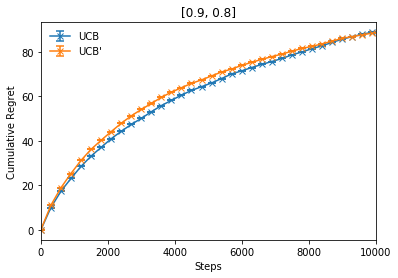

regret_means_stderr
[[ 0.00433013  0.00346987  0.00217945  0.0014      0.00217945]
 [ 0.00420833  0.0031289   0.00217945  0.00217945  0.00237487]]


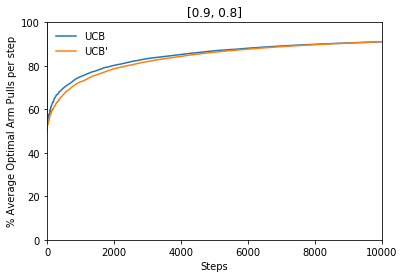

optimal_arm_pulls_mean
[[ 69.9001996   80.14142929  86.9370126   89.8760155   90.79665298]
 [ 66.95608782  78.68515742  86.27534493  89.74378203  90.81212504]]


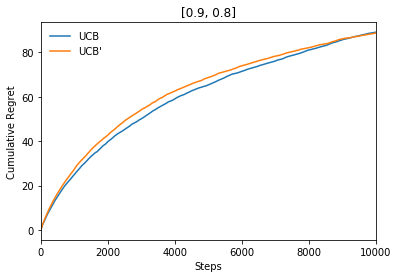

regret_means_stderr
[[ 15.08   39.737  65.328  81.002  87.441]
 [ 16.555  42.651  68.637  82.06   87.294]]

Total Optimal arm pulls : 843895.596021 and percentage is : 84.3895596021
Total Regret : 89.326

Total Optimal arm pulls : 837318.897691 and percentage is : 83.7318897691
Total Regret : 87.287


optimal_arm_percentage
          0
0  84.38956
1  83.73189


total_regret
        0
0  89.326
1  87.287


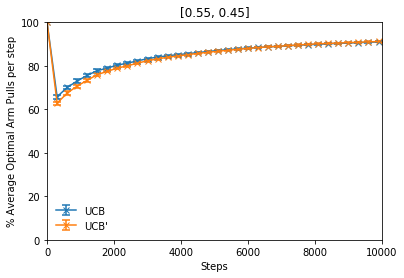

optimal_arm_means_stderr
[[ 0.88558931  0.50852369  0.33389374  0.23817554  0.208847  ]
 [ 0.75269022  0.50324491  0.34634928  0.23931588  0.21072332]]


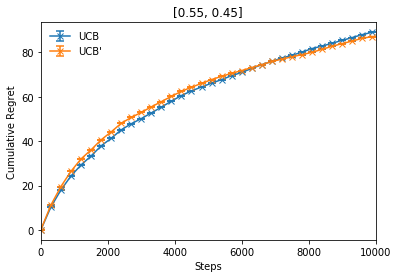

regret_means_stderr
[[ 0.00443959  0.00336303  0.00170587  0.          0.00195959]
 [ 0.00473709  0.00407308  0.00195959  0.00099499  0.00217945]]


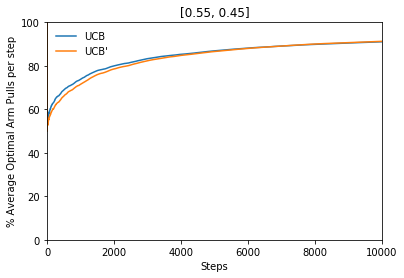

optimal_arm_pulls_mean
[[ 68.91816367  80.          86.90161968  89.82464692  90.79181139]
 [ 66.11776447  78.57871064  86.60427914  90.03462067  90.96537207]]


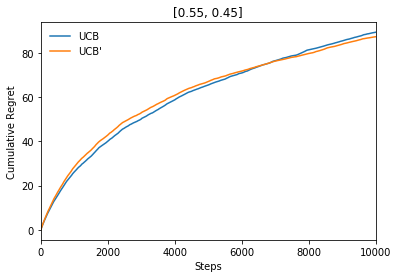

regret_means_stderr
[[ 15.572  40.02   65.505  81.413  87.487]
 [ 16.975  42.864  66.992  79.733  85.838]]


In [13]:
horizon = 10000
replications = 100
arms_prob = [[0.9, 0.6], [0.9, 0.8], [0.55, 0.45]]
UCBtype = [1,2]
m_len = len(UCBtype)

for problem in range(3):
    optimal_arm_pulls_sum = np.zeros([m_len,horizon])
    regret_per_round_sum = np.zeros([m_len,horizon])
    optimal_arm_means_stderr = np.zeros([m_len,horizon,2])
    regret_means_stderr = np.zeros([m_len,horizon,2])
    optimal_arm_percentage = np.zeros([m_len])
    total_regret = np.zeros([m_len])


    for i in range(m_len):
        regret_per_round_sum[i,:],regret_means_stderr[i,:,:], optimal_arm_pulls_sum[i,:],optimal_arm_means_stderr[i,:,:],optimal_arm_percentage[i],total_regret[i] = UCB1(horizon,replications,arms_prob[problem],ucbtype=UCBtype[i])


    step = 300
    print("\n")
    print("optimal_arm_percentage")
    tableIt(optimal_arm_percentage)
    print("\n")
    print("total_regret")
    tableIt(total_regret)

    plotOptimalArmPulls(horizon,optimal_arm_means_stderr,optimal_arm_pulls_sum,problem,step)
    plotCummRegret(horizon,regret_means_stderr,regret_per_round_sum,problem,step)
    
    plotOptimalArmPullsLine(horizon,optimal_arm_means_stderr,optimal_arm_pulls_sum,problem,step)
    plotCummRegretLine(horizon,regret_means_stderr,regret_per_round_sum,problem,step)

In [14]:
dill.dump_session(filename)

In [15]:
n = 10000
arms_prob = [[0.9, 0.6], [0.9, 0.8], [0.55, 0.45]]
gap_dependent_regret = []
gap_independent_regret = []
for i in range(3):
    gap = arms_prob[i][0] - arms_prob[i][1]
    dep_reg = (32*log(n)/gap) + 2*(1 + (2*np.pi**2/3))
    gap_dependent_regret.append(dep_reg)
    
    indep_reg = sqrt(2*n*(32*log(n) + 1 + (np.pi**2/3)))
    gap_independent_regret.append(indep_reg)
    
print('gap_dependent_regret')
print(gap_dependent_regret)

print('\ngap_independent_regret')
print(gap_independent_regret)

gap_dependent_regret
[997.5957788789119, 2962.4683915671653, 2962.4683915671635]

gap_independent_regret
[2445.4887447581286, 2445.4887447581286, 2445.4887447581286]
